In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from price_data import get_price_data, gpd_help
from CompStorage import CompetitiveStorageModel

In [2]:
gpd_help()

List of valid ticker inputs:
       Commodity Input Value
0           Gold        GC=F
1         Silver        SI=F
2       Platinum        PL=F
3         Copper        HG=F
4      Palladium        PA=F
5      Crude Oil        CL=F
6    Heating Oil        HO=F
7    Natural Gas        NG=F
8  RBOB Gasoline        RB=F


In [14]:
df=get_price_data('GC=F',start_date='2024-1-1', end_date='2024-06-01')
df

[*********************100%%**********************]  1 of 1 completed


,Date,Price
0,2024-01-02,2064.399902
1,2024-01-03,2034.199951
2,2024-01-04,2042.300049
3,2024-01-05,2042.400024
4,2024-01-08,2026.599976
...,...,...
100,2024-05-24,2332.500000
101,2024-05-28,2355.199951
102,2024-05-29,2340.300049
103,2024-05-30,2342.899902


Text(0, 0.5, 'Price')

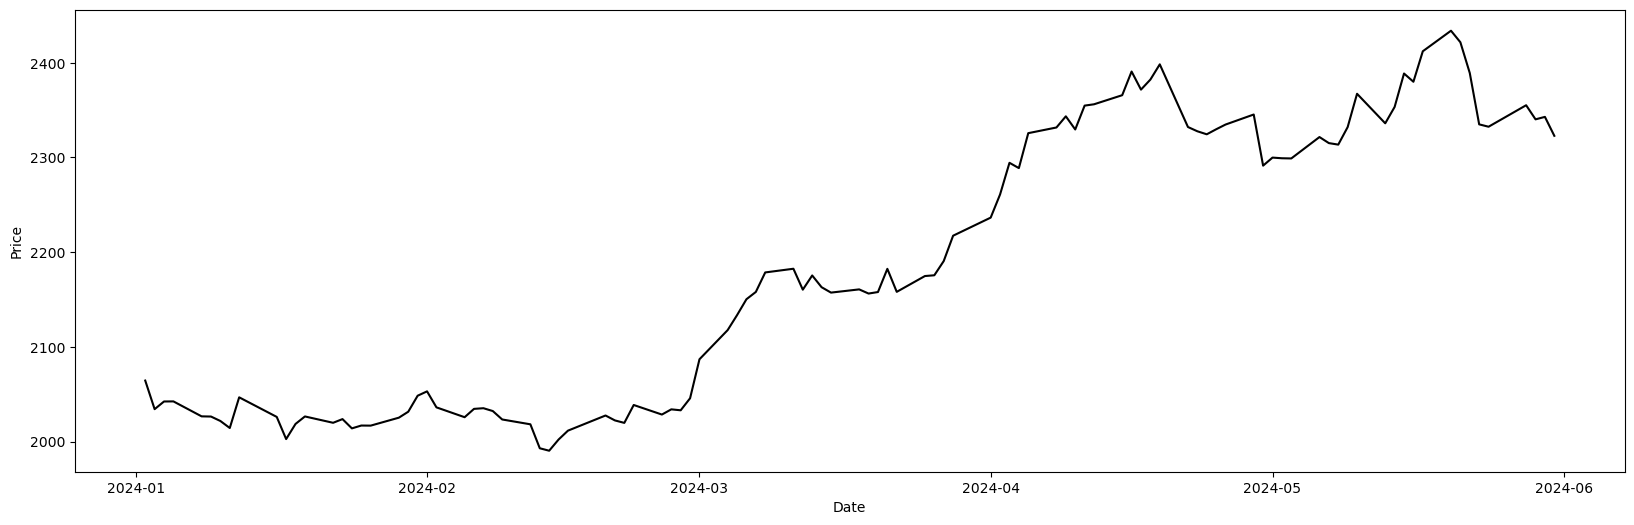

In [15]:
plt.figure(figsize=(20,6))
plt.plot(df['Date'],df['Price'], c='black')
plt.xlabel('Date')
plt.ylabel('Price')


In [22]:
model = CompetitiveStorageModel(a=200, b=-1, delta=0.05, mu=100, sigma=10, rho=0.9, r=0.05)
z = model.generate_shocks(len(df['Price']))
gold=df['Price']
price_fn = model.eq_price_fn(z)
print(price_fn)

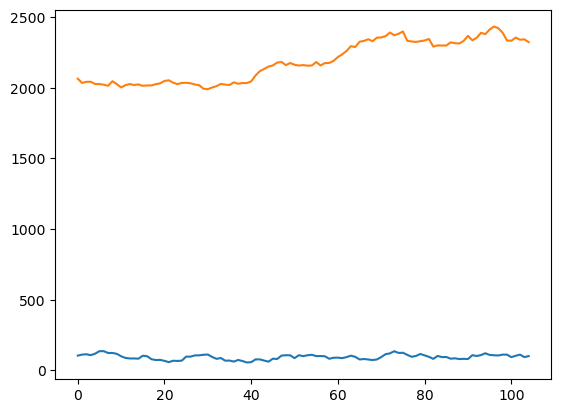

In [23]:
state_vars=model.state_variables(0,z,price_fn)

prices=np.zeros(len(state_vars))
for t in range(len(prices)):
    prices[t]=price_fn(state_vars[t])
plt.plot(prices)
plt.plot(gold)
plt.show()